# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# please do not modify the line below
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
# env_info = env.reset(train_mode=True)[brain_name] # reset the environment
# state = env_info.vector_observations[0]            # get the current state
# score = 0                                          # initialize the score
# while True:
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     score += reward                                # update the score
#     state = next_state                             # roll over the state to next time step
#     if done:                                       # exit loop if episode finished
#         break
    
# print("Score: {}".format(score))

When finished, you can close the environment.

In [6]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

The implementation below uses Deep Q Learning algorithm to train the agent. 
The code is executed until the maximum number of episodes passed is reached or when the mean of 100 most recent scores is higher or equal to 13.

In [7]:
import math
import torch
from dqn_agent import Agent
from collections import deque

"""
Deep Q Learning implementation to train the agent to perform the specified task.
Parameters:
    eps_start - starting value of epsilon-greedy action selection
    eps_min - minimum value of epsilon
    eps_decay - factor for decreasing epsilon
    n_episodes - number of training episodes

Return:
    scores - list of scores obtained during the training
    episode - episode after which the training has stopped

"""
def dqn(eps_start = 0.99, eps_min = 0.01, eps_decay = 0.995, n_episodes = 2000):
    scores = []
    scores_100 = deque(maxlen = 100)
    eps = eps_start
    
    for episode in range(n_episodes):
        #reset the environment
        environment = env.reset(train_mode = True)[brain_name]
        
        #set initalising parameters
        curr_score = 0
        curr_state = environment.vector_observations[0]
        episode_end = False
        
        #episode loop
        while not episode_end:
            #make a next action
            action = int(agent.act(curr_state, eps))
            environment = env.step(action)[brain_name]
            
            #get next state and the reward
            next_state = environment.vector_observations[0]
            reward = environment.rewards[0]
            
            #check if the episode is finished
            episode_end = environment.local_done[0]
            
            #next learning step
            agent.step(curr_state, action, reward, next_state, episode_end)
            
            #update score and state
            curr_score += reward
            curr_state = next_state
            
            if episode_end:
                break
        
        #save the score
        scores_100.append(curr_score)
        scores.append(curr_score)
        
        #epsilon decay
        eps = max(eps_decay * eps, eps_min)
        
        if (episode % 100 == 0):
            print('Episode: {}, Score: {}, Mean_100: {}, Epsilon: {}'.format(episode, curr_score, np.mean(scores_100), eps))
        
        #check the criteria
        if np.mean(scores_100) > 13:
            print('Episode: {}, Score: {}, Mean_100: {}, Epsilon: {}'.format(episode, curr_score, np.mean(scores_100), eps))
            break
            
    #save the agent's weights
    torch.save(agent.qnetwork_local.state_dict(), 'weights_'+str(episode)+'.trn')
    
    return scores, episode

Finding appropriate hyperparamenters.
Five different trainings sessions are run, each with different number of neurons in the fully connected layers of the network. Each resulting set of weights is saved to a .trn file.

In [8]:
import random
import matplotlib.pyplot as plt

scores = []
episodes = []

for i in range(5):
    #pick the number of neurons for each of the FC layer
    fc1 = random.randrange(48, 128, 16)
    fc2 = random.randrange(fc1 - 16, fc1 + 16, 8)
    epsilon = random.randrange(980, 995, 1)/1000.
    
    #print relevant information
    print('Training: ', i)
    print('Epsilon: ', epsilon)
    print('FC_1: ', fc1, 'FC_2: ', fc2)
    
    #create the agent and train it
    agent = Agent(state_size = 37, action_size = 4, seed = 1, fc1_units = fc1, fc2_units = fc2)
    score, episode = dqn(eps_start = epsilon)
    scores.append(score)
    episodes.append(episode)
    
    print("\n============ end of training ============")
    

Training:  0
Epsilon:  0.993
FC_1:  48 FC_2:  32
Episode: 0, Score: 1.0, Mean_100: 1.0, Epsilon: 0.988035
Episode: 100, Score: -1.0, Mean_100: 1.21, Epsilon: 0.5985223932181167
Episode: 200, Score: 5.0, Mean_100: 4.84, Epsilon: 0.3625671713892139
Episode: 300, Score: 13.0, Mean_100: 8.63, Epsilon: 0.21963247366965266
Episode: 400, Score: 15.0, Mean_100: 10.99, Epsilon: 0.13304685944240371
Episode: 461, Score: 16.0, Mean_100: 13.01, Epsilon: 0.09799694861142572

============ end of training ============
Training:  1
Epsilon:  0.984
FC_1:  48 FC_2:  32
Episode: 0, Score: 2.0, Mean_100: 2.0, Epsilon: 0.97908
Episode: 100, Score: 0.0, Mean_100: 1.19, Epsilon: 0.5930977189593419
Episode: 200, Score: 7.0, Mean_100: 3.99, Epsilon: 0.3592810640956556
Episode: 300, Score: 11.0, Mean_100: 7.81, Epsilon: 0.21764184702007852
Episode: 400, Score: 10.0, Mean_100: 10.61, Epsilon: 0.1318409966680012
Episode: 500, Score: 13.0, Mean_100: 13.02, Epsilon: 0.07986537809894768
Episode: 500, Score: 13.0, Mea

Plot Training:  0


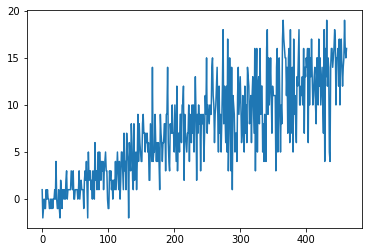

Plot Training:  1


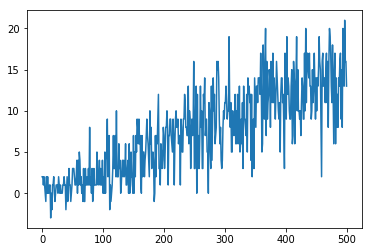

Plot Training:  2


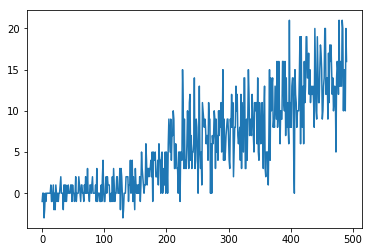

Plot Training:  3


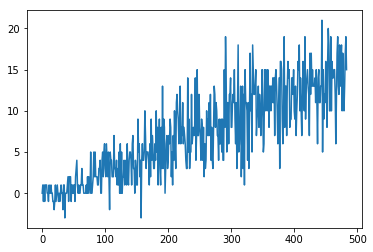

Plot Training:  4


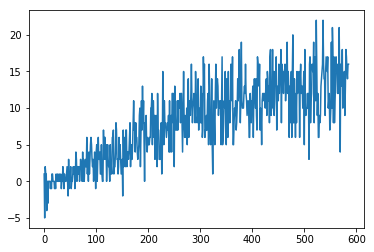

In [9]:
#plot the results

training = 0
for score in scores:
    print('Plot Training: ', training)
    plt.plot(scores[training])
    plt.show()
    training += 1
    

In [12]:
#test loading weights:
torch.load('weights_461.trn')

OrderedDict([('fc1.weight',
              tensor([[ 8.5467e-02,  1.1182e-02, -4.8996e-02,  ..., -2.1414e+00,
                       -8.8357e-03,  3.7661e-02],
                      [ 9.4175e-03, -5.6528e-02, -2.2787e-02,  ...,  2.6592e-01,
                        4.9044e-02,  7.4642e-04],
                      [ 6.6260e-02,  1.8872e-01,  1.0296e-01,  ...,  1.9915e-01,
                       -1.7908e-02,  8.9930e-03],
                      ...,
                      [ 9.1610e-02, -2.5062e-01, -4.4678e-02,  ...,  4.0884e-03,
                       -6.2174e-03, -1.9212e-02],
                      [ 6.8088e-02,  1.5896e-02,  8.0971e-03,  ...,  7.9105e-02,
                       -3.1141e-02, -9.5079e-03],
                      [-1.3287e-01, -3.0883e-02, -1.2914e-01,  ..., -6.1688e-02,
                        1.3539e-01, -1.6920e-02]], device='cuda:0')),
             ('fc1.bias',
              tensor([ 0.1729, -0.0606,  0.1662, -0.0321,  0.0729,  0.0611, -0.1142,
                       0.045